In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
import collections
import pickle
import gc

In [2]:
df = pd.read_csv('yt_allcountry_trend5days_nostr.csv', index_col=None)

In [3]:
df

,views,likes,dislikes,comment_count,trend_over_5_days
0,17158579,787425,43420,125882,1
1,1014651,127794,1688,13030,0
2,3191434,146035,5339,8181,1
3,2095828,132239,1989,17518,1
4,33523622,1634130,21082,85067,1
...,...,...,...,...,...
178694,279728,19691,135,579,0
178695,1549110,21905,1516,1318,0
178696,2183462,79677,2034,3464,0
178697,607422,26166,895,3517,0


In [4]:
# df['trend_over_5_days'] = np.where(df["trend_days"]>5, 1, 0)

In [5]:
X = df.drop(['trend_over_5_days'],axis=1)
y = df['trend_over_5_days']

In [6]:
X

,views,likes,dislikes,comment_count
0,17158579,787425,43420,125882
1,1014651,127794,1688,13030
2,3191434,146035,5339,8181
3,2095828,132239,1989,17518
4,33523622,1634130,21082,85067
...,...,...,...,...
178694,279728,19691,135,579
178695,1549110,21905,1516,1318
178696,2183462,79677,2034,3464
178697,607422,26166,895,3517


In [7]:
y

0         1
1         0
2         1
3         1
4         1
         ..
178694    0
178695    0
178696    0
178697    0
178698    0
Name: trend_over_5_days, Length: 178699, dtype: int64

### Normalizing

In [8]:
from sklearn.preprocessing import StandardScaler, Normalizer

X_normed = Normalizer().fit_transform(X)
X_normed

array([[9.98918650e-01, 4.58414137e-02, 2.52777621e-03, 7.32845520e-03],
       [9.92079719e-01, 1.24951176e-01, 1.65044982e-03, 1.27401429e-02],
       [9.98950054e-01, 4.57103832e-02, 1.67115922e-03, 2.56073301e-03],
       ...,
       [9.99333174e-01, 3.64667987e-02, 9.30926975e-04, 1.58541349e-03],
       [9.99055672e-01, 4.30364569e-02, 1.47204880e-03, 5.78457612e-03],
       [9.99617453e-01, 2.75194639e-02, 9.91874757e-04, 2.57752488e-03]])

In [11]:
X_normed = pd.DataFrame(X_normed, columns = ['views', 'likes', 'dislikes', 'comment_count'])
X_normed

,views,likes,dislikes,comment_count
0,0.998919,0.045841,0.002528,0.007328
1,0.992080,0.124951,0.001650,0.012740
2,0.998950,0.045710,0.001671,0.002561
3,0.997980,0.062969,0.000947,0.008342
4,0.998811,0.048688,0.000628,0.002535
...,...,...,...,...
178694,0.997529,0.070219,0.000481,0.002065
178695,0.999899,0.014139,0.000979,0.000851
178696,0.999333,0.036467,0.000931,0.001585
178697,0.999056,0.043036,0.001472,0.005785


## X use subsets

total n = 178699

1. n = 10000
2. n = 50000
3. n = 100000

## Then Test Train split

In [12]:
X_10k = X_normed[:10000]
X_50k = X_normed[:50000]
X_100k = X_normed[:100000]

y_10k = y[:10000]
y_50k = y[:50000]
y_100k = y[:100000]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normed, y, test_size=0.25, random_state=42)
X_train_10k, X_test_10k, y_train_10k, y_test_10k = train_test_split(X_10k, y_10k, test_size=0.25, random_state=42)
X_train_50k, X_test_50k, y_train_50k, y_test_50k = train_test_split(X_50k, y_50k, test_size=0.25, random_state=42)
X_train_100k, X_test_100k, y_train_100k, y_test_100k = train_test_split(X_100k, y_100k, test_size=0.25, random_state=42)

In [14]:
X_train

,views,likes,dislikes,comment_count
113617,0.998252,0.047752,0.000504,0.034807
65534,0.999964,0.008323,0.001433,0.000614
126111,0.999891,0.014735,0.000523,0.001045
8740,0.995418,0.093358,0.001242,0.020653
57496,0.985429,0.169733,0.000505,0.010934
...,...,...,...,...
119879,0.999987,0.004752,0.001000,0.001751
103694,0.999894,0.013830,0.000575,0.004550
131932,0.999987,0.005099,0.000611,0.000234
146867,0.999941,0.010673,0.000844,0.001990


In [15]:
X_test

,views,likes,dislikes,comment_count
117989,0.998838,0.048169,0.000771,0.001156
101258,0.998098,0.061237,0.001031,0.007058
44861,0.999799,0.018328,0.001833,0.007942
5811,0.999913,0.010451,0.001528,0.007921
63847,0.999992,0.002646,0.001469,0.002741
...,...,...,...,...
131037,0.997581,0.068728,0.000483,0.010388
112353,0.999985,0.005131,0.000463,0.001816
75019,0.999883,0.015254,0.000538,0.000423
93855,0.999929,0.011751,0.001645,0.001329


### Classifier 1: Naive Bayes - Gaussian Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, CategoricalNB

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve

In [17]:
%%time
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GNB_predicted = GNB.predict(X_test)
GNB_precision = precision_score(y_test, GNB_predicted)
GNB_recall = recall_score(y_test, GNB_predicted)
GNB_f1 = f1_score(y_test, GNB_predicted)

print(f'Accuracy Score: {GNB.score(X_test, y_test)}')
print(f'Precision Score: {GNB_precision}')
print(f'Recall Score: {GNB_recall}')
print(f'F1 Score: {GNB_f1}')

Accuracy Score: 0.9700951315053161
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0
Wall time: 40.5 ms


In [18]:
%%time
GNB = GaussianNB()
GNB.fit(X_train_10k, y_train_10k)

GNB_predicted = GNB.predict(X_test_10k)
GNB_precision = precision_score(y_test_10k, GNB_predicted)
GNB_recall = recall_score(y_test_10k, GNB_predicted)
GNB_f1 = f1_score(y_test_10k, GNB_predicted)

print(f'Accuracy Score: {GNB.score(X_test_10k, y_test_10k)}')
print(f'Precision Score: {GNB_precision}')
print(f'Recall Score: {GNB_recall}')
print(f'F1 Score: {GNB_f1}')

Accuracy Score: 0.8808
Precision Score: 0.1891891891891892
Recall Score: 0.09170305676855896
F1 Score: 0.12352941176470589
Wall time: 6.51 ms


In [19]:
%%time
GNB = GaussianNB()
GNB.fit(X_train_50k, y_train_50k)

GNB_predicted = GNB.predict(X_test_50k)
GNB_precision = precision_score(y_test_50k, GNB_predicted)
GNB_recall = recall_score(y_test_50k, GNB_predicted)
GNB_f1 = f1_score(y_test_50k, GNB_predicted)

print(f'Accuracy Score: {GNB.score(X_test_50k, y_test_50k)}')
print(f'Precision Score: {GNB_precision}')
print(f'Recall Score: {GNB_recall}')
print(f'F1 Score: {GNB_f1}')

Accuracy Score: 0.9344
Precision Score: 0.053763440860215055
Recall Score: 0.02626970227670753
F1 Score: 0.03529411764705882
Wall time: 11.5 ms


In [20]:
%%time
GNB = GaussianNB()
GNB.fit(X_train_100k, y_train_100k)

GNB_predicted = GNB.predict(X_test_100k)
GNB_precision = precision_score(y_test_100k, GNB_predicted)
GNB_recall = recall_score(y_test_100k, GNB_predicted)
GNB_f1 = f1_score(y_test_100k, GNB_predicted)

print(f'Accuracy Score: {GNB.score(X_test_100k, y_test_100k)}')
print(f'Precision Score: {GNB_precision}')
print(f'Recall Score: {GNB_recall}')
print(f'F1 Score: {GNB_f1}')

Accuracy Score: 0.9466
Precision Score: 0.0979381443298969
Recall Score: 0.03714565004887586
F1 Score: 0.05386250885896527
Wall time: 20.5 ms


In [21]:
%%time
from sklearn.model_selection import cross_val_score

GNB_cvs = cross_val_score(GNB, X, y, 
                          cv=10, 
                          n_jobs=-1,)

print(f"GaussianNB 10-CV score: {GNB_cvs}")
print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(GNB_cvs)}")

GaussianNB 10-CV score: [0.92126469 0.95422496 0.96552882 0.97437045 0.9616676  0.96614438
 0.96205932 0.96149972 0.95148293 0.95327103]
GaussianNB 10-fold Cross Val Avg: 0.9571513893174485
Wall time: 1.33 s


In [22]:
print(len(GNB.predict_proba(X_test)))
GNB_probs = GNB.predict_proba(X_test)
GNB_probs
# print(min(GNB_probs[0])

44675


array([[0.97330486, 0.02669514],
       [0.96217207, 0.03782793],
       [0.97697024, 0.02302976],
       ...,
       [0.98184755, 0.01815245],
       [0.98176221, 0.01823779],
       [0.68006865, 0.31993135]])

In [23]:
GNB_probs[:,0]

array([0.97330486, 0.96217207, 0.97697024, ..., 0.98184755, 0.98176221,
       0.68006865])

In [24]:
GNB_probs[:,1]

array([0.02669514, 0.03782793, 0.02302976, ..., 0.01815245, 0.01823779,
       0.31993135])

In [25]:
print(f"min of left col = {min(GNB_probs[:,0])}, max of right col = {max(GNB_probs[:,1])}")
print(f"max of left col = {max(GNB_probs[:,0])}, min of right col = {min(GNB_probs[:,1])}")

min of left col = 0.0, max of right col = 1.0
max of left col = 1.0, min of right col = 2.1054029089043755e-154


In [26]:
len(GNB_probs[:,0])

44675

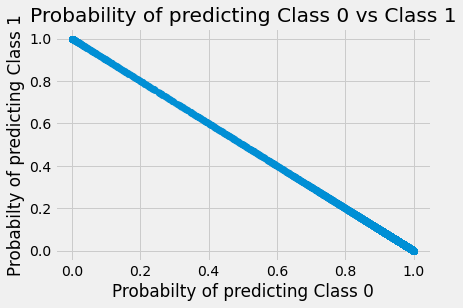

In [27]:
fig, ax = plt.subplots()
plt.scatter(GNB_probs[:,0], GNB_probs[:,1], alpha=0.5)

plt.title('Probability of predicting Class 0 vs Class 1')
ax.set_xlabel('Probabilty of predicting Class 0')
ax.set_ylabel('Probabilty of predicting Class 1')

plt.show()

In [28]:
for i, val in enumerate(GNB_probs[:,0]):
    if i < 10:
        print(i, val)

0 0.9733048604612716
1 0.962172073708085
2 0.9769702399097538
3 0.9786109468027597
4 0.9819912197167179
5 0.9835583158086307
6 0.9824853911705141
7 0.9802121823397846
8 0.9292354338481813
9 0.9696050175689663


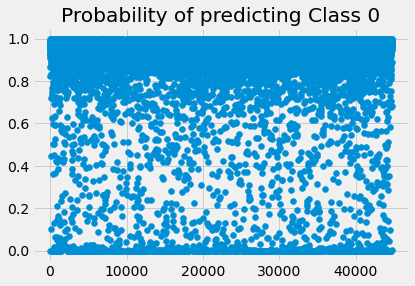

In [29]:
xrange = [i for i in range(len(GNB_probs[:,0]))]
plt.scatter(xrange, GNB_probs[:,0])
plt.title('Probability of predicting Class 0')

plt.show()

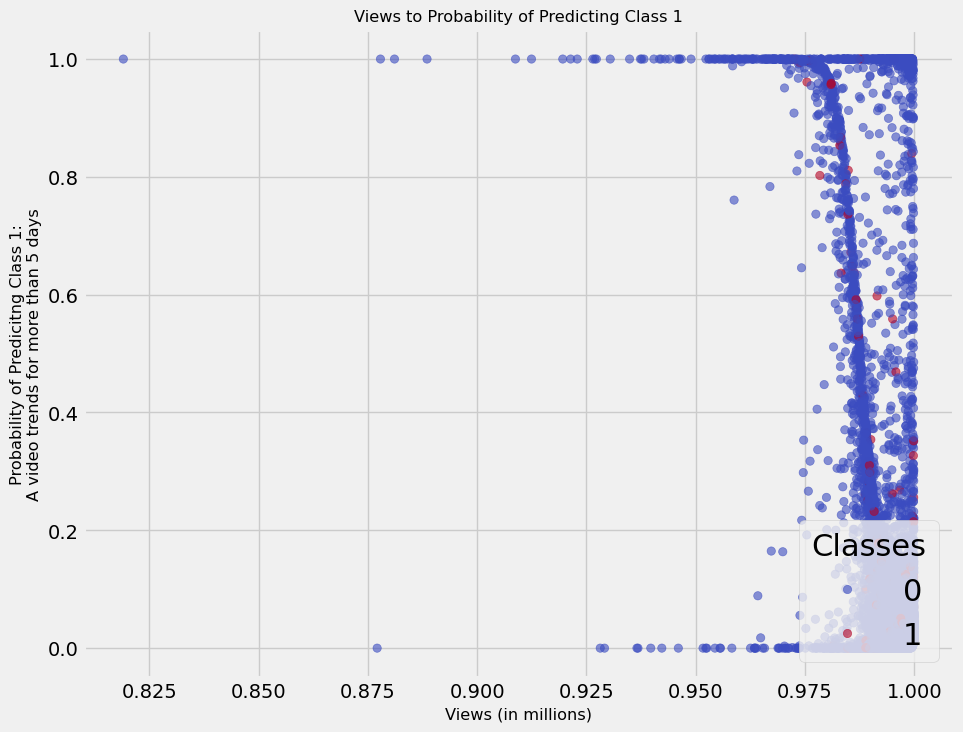

In [30]:
plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(X_test['views'], GNB_probs[:,1], 
                        c=y_test, 
                        cmap='coolwarm',
                        alpha=0.6)
plt.title('Views to Probability of Predicting Class 1', fontsize='small')
plt.xlabel('Views (in millions)', fontsize='small')
plt.ylabel('Probability of Predicitng Class 1:\nA video trends for more than 5 days', fontsize='small')
plt.rcParams.update({'font.size': 22})


plt.legend(*scatter.legend_elements(), loc='lower right', title='Classes')
# ax.legend()

plt.show()

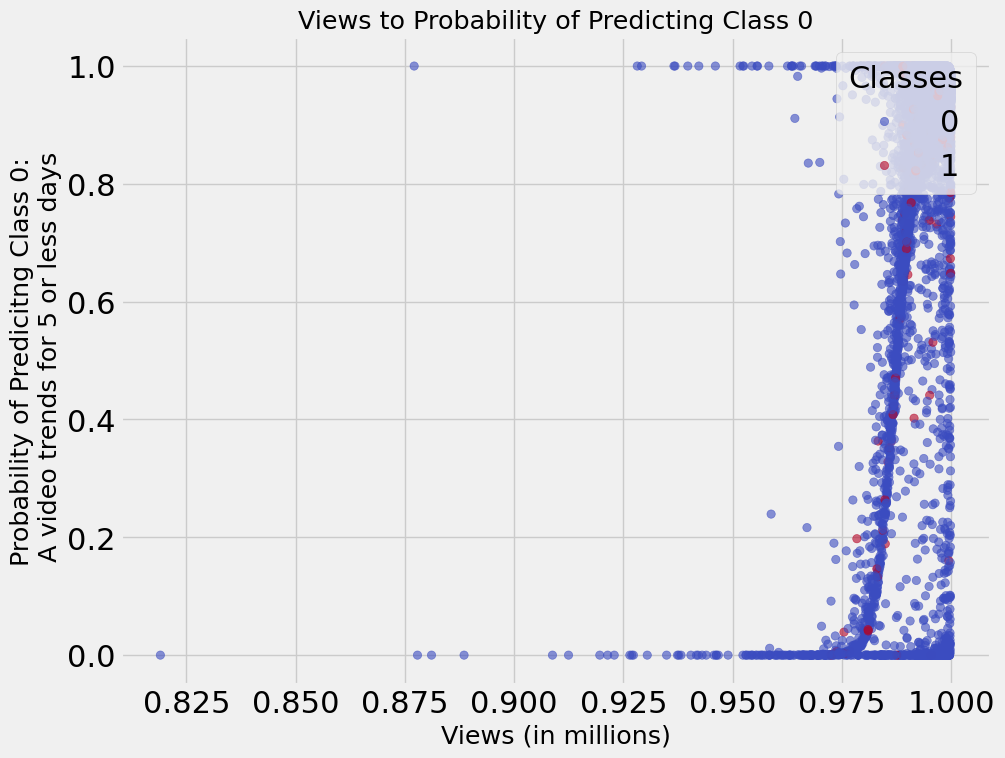

In [31]:
plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(X_test['views'], GNB_probs[:,0], 
                        c=y_test, 
                        cmap='coolwarm',
                        alpha=0.6)
plt.title('Views to Probability of Predicting Class 0', fontsize='small')
plt.xlabel('Views (in millions)', fontsize='small')
plt.ylabel('Probability of Predicitng Class 0:\n A video trends for 5 or less days', fontsize='small')
plt.rcParams.update({'font.size': 22})


plt.legend(*scatter.legend_elements(), loc='upper right', title='Classes')
# ax.legend()

plt.show()

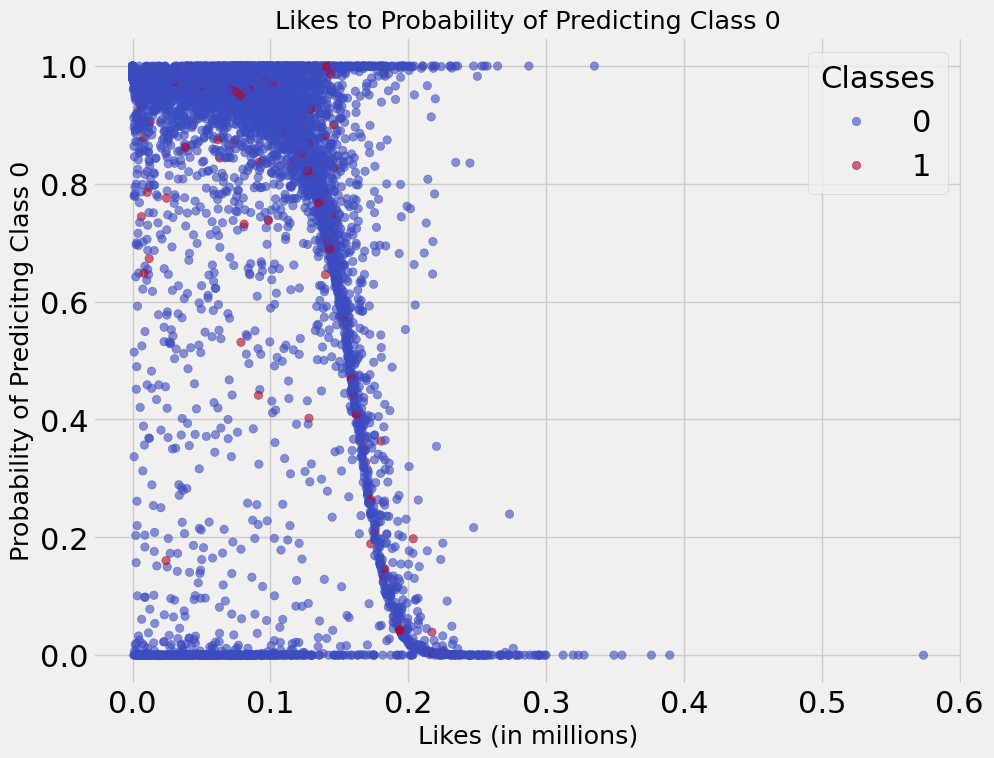

In [32]:
xrange = [i for i in range(len(GNB_probs[:,0]))]

plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(X_test['likes'], GNB_probs[:,0], 
                        c=y_test, 
                        cmap='coolwarm',
                        alpha=0.6)
plt.title('Likes to Probability of Predicting Class 0', fontsize='small')
plt.xlabel('Likes (in millions)', fontsize='small')
plt.ylabel('Probability of Predicitng Class 0', fontsize='small')
plt.rcParams.update({'font.size': 22})


plt.legend(*scatter.legend_elements(), loc='upper right', title='Classes')
# ax.legend()

plt.show()

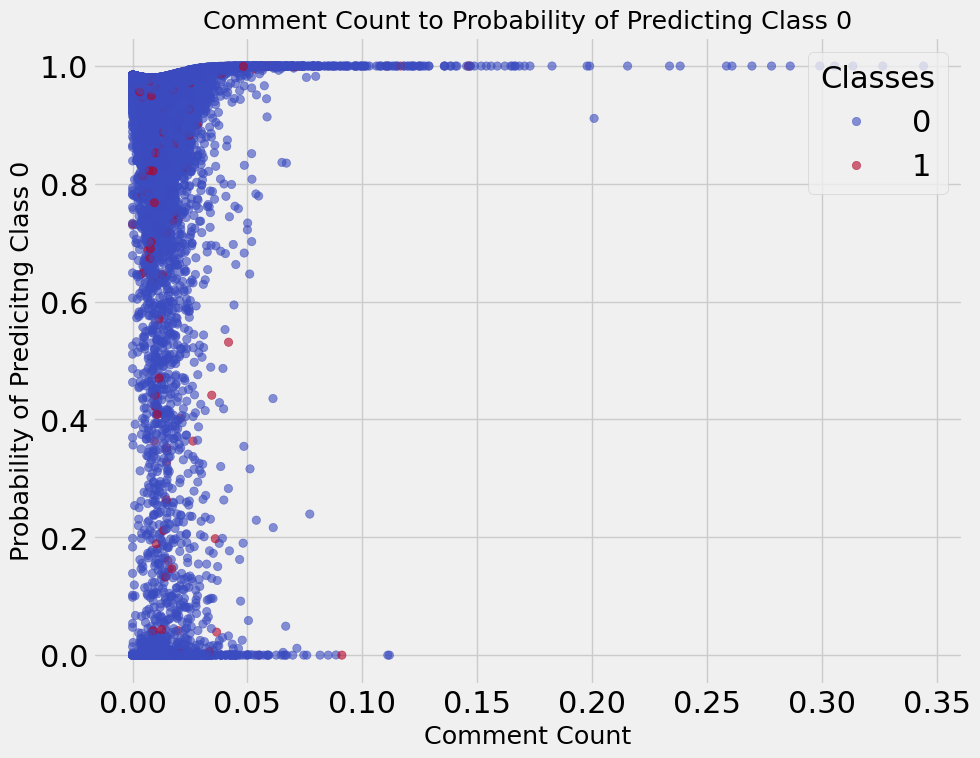

In [33]:
xrange = [i for i in range(len(GNB_probs[:,0]))]

plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(X_test['comment_count'], GNB_probs[:,0], 
                        c=y_test, 
                        cmap='coolwarm',
                        alpha=0.6)
plt.title('Comment Count to Probability of Predicting Class 0', fontsize='small')
plt.xlabel('Comment Count', fontsize='small')
plt.ylabel('Probability of Predicitng Class 0', fontsize='small')
plt.rcParams.update({'font.size': 22})


plt.legend(*scatter.legend_elements(), loc='upper right', title='Classes')
# ax.legend()

plt.show()

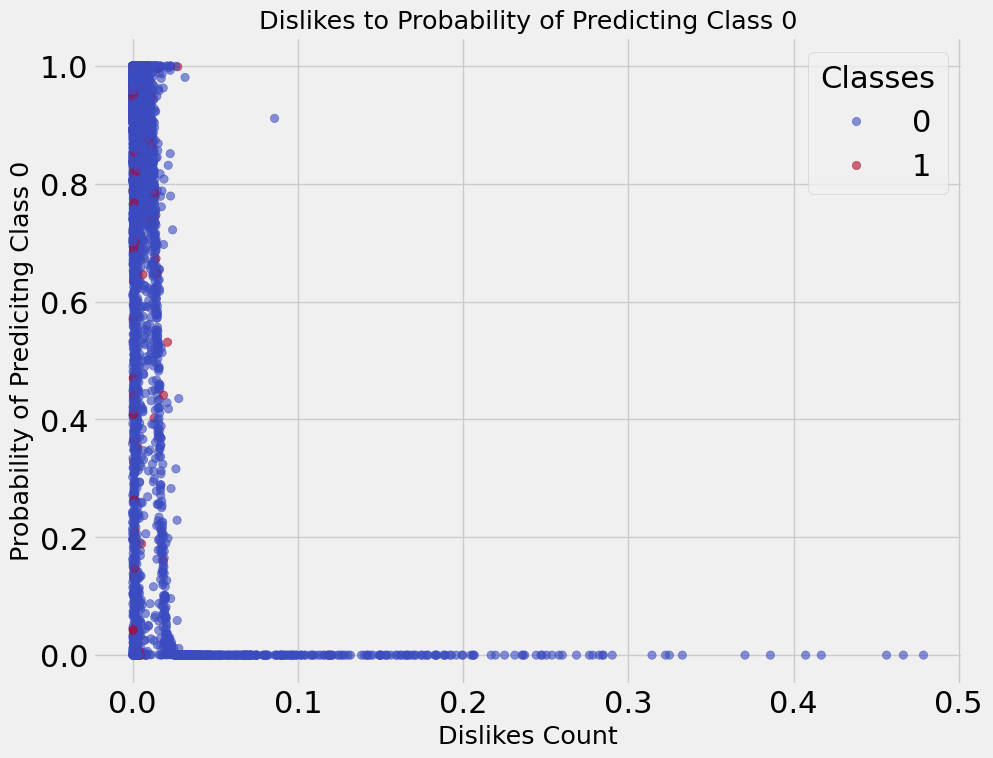

In [34]:
xrange = [i for i in range(len(GNB_probs[:,0]))]

plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(X_test['dislikes'], GNB_probs[:,0], 
                        c=y_test, 
                        cmap='coolwarm',
                        alpha=0.6)
plt.title('Dislikes to Probability of Predicting Class 0', fontsize='small')
plt.xlabel('Dislikes Count', fontsize='small')
plt.ylabel('Probability of Predicitng Class 0', fontsize='small')
plt.rcParams.update({'font.size': 22})


plt.legend(*scatter.legend_elements(), loc='upper right', title='Classes')
# ax.legend()

plt.show()

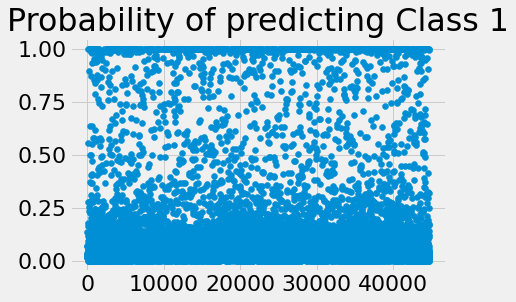

In [35]:
# xrange = [i for i in range(len(GNB_probs[:,0]))]
plt.scatter(xrange, GNB_probs[:,1])
plt.title('Probability of predicting Class 1')

plt.show()

## Histogram to show quantity of predictions to probability

In [36]:
from numpy import arange
bins = [i for i in arange(0.0, 1.0, 0.1)]
bins 

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

In [37]:
import numpy as np

In [38]:
bins = np.linspace(0.0,1.0, num=11)
bins

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

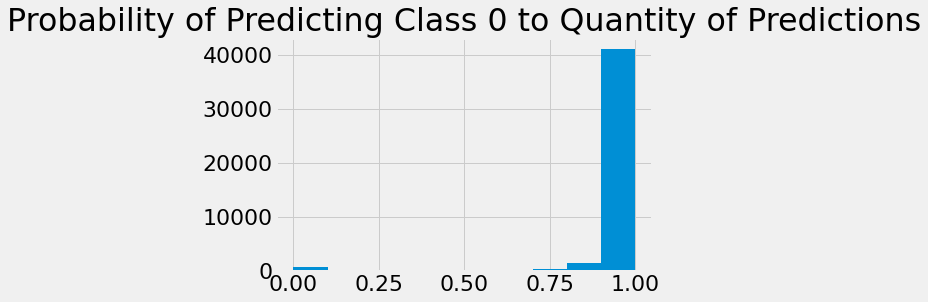

In [39]:
plt.hist(GNB_probs[:,0], bins)
plt.title('Probability of Predicting Class 0 to Quantity of Predictions')

plt.show()

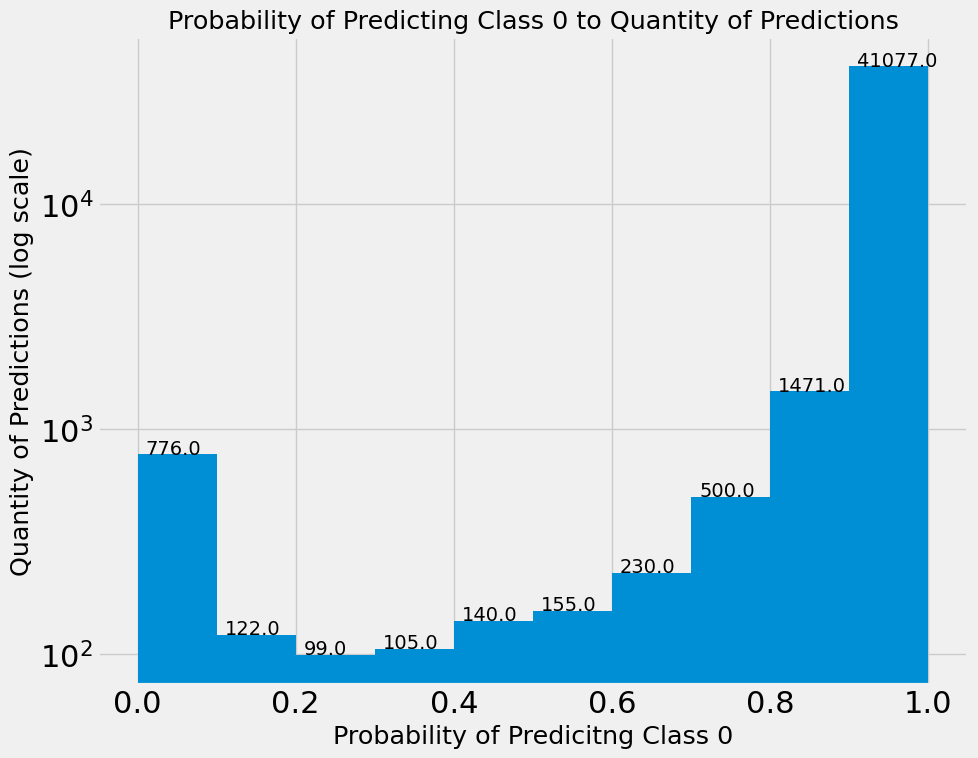

In [40]:
bins2 = 10

plt.figure(figsize=(10, 8), dpi=100)

arr = plt.hist(GNB_probs[:,0], bins2,
#                c=,
              )

# plt.ylim(0,1000)
plt.yscale('log')
plt.title('Probability of Predicting Class 0 to Quantity of Predictions',fontsize='small')
plt.xlabel('Probability of Predicitng Class 0', fontsize='small')
plt.ylabel('Quantity of Predictions (log scale)', fontsize='small')
plt.rcParams.update({'font.size': 22})

for i in range(bins2):
    plt.text(arr[1][i]+0.01,
             arr[0][i]+1,
             str(arr[0][i]), 
             fontsize=14, 
            )
    plt.text(arr[1][i],
             arr[0][i]/1.5,
             str(), 
             fontsize=14, 
            )


plt.show()

In [41]:
arr

(array([  776.,   122.,    99.,   105.,   140.,   155.,   230.,   500.,
         1471., 41077.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

## Calibration Curves

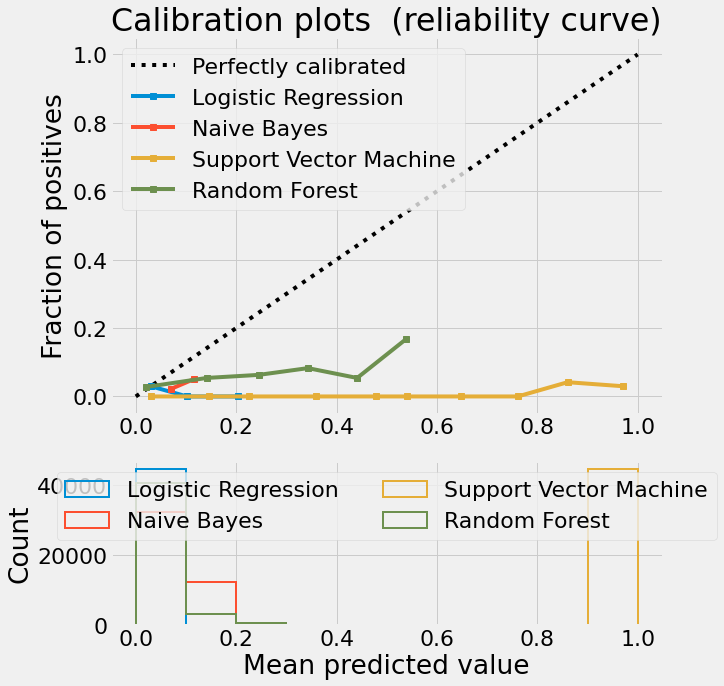

Wall time: 42.8 s


In [43]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic Regression'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Machine'),
                  (rfc, 'Random Forest')]:
    
#     Already trained
    clf.fit(X_train, y_train)

    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="upper left")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [44]:
count = 0
for val in GNB_probs[:,1]:
    if val >= 0.9:
        count += 1
        print(val)

print(f"# of val above 0.9 = {count}")
print(f"% of val above 0.9 = {count/len(GNB_probs[:,1])}")

0.9998736229910278
0.9999999954191594
0.99999018168786
0.9999999991040456
1.0
0.9999840768496849
0.9999999765883045
1.0
0.9842161381455342
0.9898687456044901
0.9999997778725775
0.9997142593498008
0.9805438651387929
0.9925156569990755
0.9338698903322444
0.9925883858440608
1.0
0.9347584539410534
0.9516839908768883
0.9911432337149607
0.9999983514157096
0.9999118263409901
0.9992899833701826
0.9391550328326812
0.9999999998614584
0.9892383831823878
0.9656858921133635
0.9420498591870133
1.0
0.9581207250815779
1.0
0.9999999999653291
1.0
0.9999999999988738
0.9750851222884601
0.9609427861284806
0.9674961329125255
0.9445187648380775
0.9842075375121623
0.9066851093364766
0.9843928797268504
1.0
0.9999067216273557
0.9833084073642548
0.9326366257230844
1.0
1.0
0.9999999999998348
0.9983443552070282
1.0
0.9817900714028682
0.9783470870442994
1.0
1.0
1.0
1.0
1.0
0.9932234780609804
0.9934966263753532
1.0
1.0
0.9999640537641978
0.9997967462892361
0.9990325346594742
0.9997751190648996
1.0
0.9067291209662873

In [45]:
# fig, ax = plt.subplots()

# x_val=len(GNB_probs)

# ax.bar(x_val, GNB_probs[:,0])


# ax.set_ylabel('Probability')
# ax.set_title('Probability of x_i being in class 0')
# plt.show()

In [46]:
count = 0
for val in GNB_probs[:,0]:
    if 0.8 > val > 0.2:
        count += 1
        print(val)

print(f"# of val around 0.5 = {count}")

0.4454361838525466
0.7211612386695441
0.7461727769438513
0.7246649900482854
0.765968819069081
0.7322738452830976
0.6277732145807101
0.7745809385350153
0.3631610038633487
0.5027465787299298
0.5952315378789089
0.7966748581766321
0.6921274148971149
0.5032250027988298
0.6324941661870109
0.4507095123882432
0.7106655527177127
0.6349825569419519
0.5927299515632924
0.779770487817705
0.3670154395655985
0.5948899926807388
0.5281596427902865
0.4221753579283424
0.7238841500537498
0.7063814565020547
0.4195934009358602
0.77141487098698
0.7887735057459886
0.2125014334425134
0.7568214917235611
0.38547374467302475
0.7570220350830303
0.4377879817855455
0.657222776918527
0.7757675281327608
0.7034556511403344
0.5938795831316986
0.6886572737331713
0.7180511152385642
0.7936223323888908
0.23603218584407745
0.42582676235954026
0.5683363920221279
0.5582508808524047
0.25801633294416987
0.5837504665828805
0.4604631892140924
0.4202935480650057
0.7601786886927464
0.7560488534883767
0.5106922370615854
0.77950672982

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve

In [48]:
 GNB.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
GNB_predicted = GNB.predict(X_test)
GNB_precision = precision_score(y_test, GNB_predicted)
GNB_recall = recall_score(y_test, GNB_predicted)
GNB_f1 = f1_score(y_test, GNB_predicted)

print(f'Precision Score: {GNB_precision}')
print(f'Recall Score: {GNB_recall}')
print(f'F1 Score: {GNB_f1}')

Precision Score: 0.02254428341384863
Recall Score: 0.020958083832335328
F1 Score: 0.021722265321955


### Classifier 2: Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [52]:
%%time
clf_log = LogisticRegression(random_state=42,
                            verbose=2,
                            n_jobs=-1,)
clf_log.fit(X_train,y_train)

print(f'Accuracy Score:  {clf_log.score(X_test,y_test)}')

clf_log_predicted = clf_log.predict(X_test)
clf_log_precision = precision_score(y_test, clf_log_predicted)
clf_log_recall = recall_score(y_test, clf_log_predicted)
clf_log_f1 = f1_score(y_test, clf_log_predicted)

print(f'Predicted Array: {clf_log_predicted}')
print(f'Precision Score: {clf_log_precision}')
print(f'Recall Score: {clf_log_recall}')
print(f'F1 Score: {clf_log_f1}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Accuracy Score:  0.9700951315053161
Predicted Array: [0 0 0 ... 0 0 0]
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0
Wall time: 718 ms


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


In [53]:
%%time
clf_log = LogisticRegression(random_state=42,
                            verbose=2,
                            n_jobs=-1,)
clf_log.fit(X_train_10k,y_train_10k)

clf_log_predicted = GNB.predict(X_test_10k)
clf_log_precision = precision_score(y_test_10k, clf_log_predicted)
clf_log_recall = recall_score(y_test_10k, clf_log_predicted)
clf_log_f1 = f1_score(y_test_10k, clf_log_predicted)

print(f'Accuracy Score:  {clf_log.score(X_test_10k, y_test_10k)}')
print(f'Precision Score: {clf_log_precision}')
print(f'Recall Score:    {clf_log_recall}')
print(f'F1 Score:        {clf_log_f1}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Accuracy Score:  0.908
Precision Score: 0.18518518518518517
Recall Score:    0.021834061135371178
F1 Score:        0.03906249999999999
Wall time: 296 ms


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [54]:
%%time
clf_log = LogisticRegression(random_state=42,
                            verbose=2,
                            n_jobs=-1,)
clf_log.fit(X_train_50k,y_train_50k)

clf_log_predicted = GNB.predict(X_test_50k)
clf_log_precision = precision_score(y_test_50k, clf_log_predicted)
clf_log_recall = recall_score(y_test_50k, clf_log_predicted)
clf_log_f1 = f1_score(y_test_50k, clf_log_predicted)

print(f'Accuracy Score:  {clf_log.score(X_test_50k, y_test_50k)}')
print(f'Precision Score: {clf_log_precision}')
print(f'Recall Score:    {clf_log_recall}')
print(f'F1 Score:        {clf_log_f1}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Accuracy Score:  0.95432
Precision Score: 0.06451612903225806
Recall Score:    0.024518388791593695
F1 Score:        0.03553299492385787
Wall time: 473 ms


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [55]:
%%time
clf_log = LogisticRegression(random_state=42,
                            verbose=2,
                            n_jobs=-1,)
clf_log.fit(X_train_100k,y_train_100k)

clf_log_predicted = GNB.predict(X_test_100k)
clf_log_precision = precision_score(y_test_100k, clf_log_predicted)
clf_log_recall = recall_score(y_test_100k, clf_log_predicted)
clf_log_f1 = f1_score(y_test_100k, clf_log_predicted)

print(f'Accuracy Score:  {clf_log.score(X_test_100k, y_test_100k)}')
print(f'Precision Score: {clf_log_precision}')
print(f'Recall Score:    {clf_log_recall}')
print(f'F1 Score:        {clf_log_f1}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Accuracy Score:  0.95908
Precision Score: 0.0979381443298969
Recall Score:    0.03714565004887586
F1 Score:        0.05386250885896527
Wall time: 574 ms


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished


In [56]:
log_probs = clf_log.predict_proba(X_test)

In [57]:
print(f"min of left col = {min(log_probs[:,0])}, max of right col = {max(log_probs[:,1])}")
print(f"max of left col = {max(log_probs[:,0])}, min of right col = {min(log_probs[:,1])}")

min of left col = 0.35773264559972195, max of right col = 0.642267354400278
max of left col = 0.9754393440522092, min of right col = 0.02456065594779079


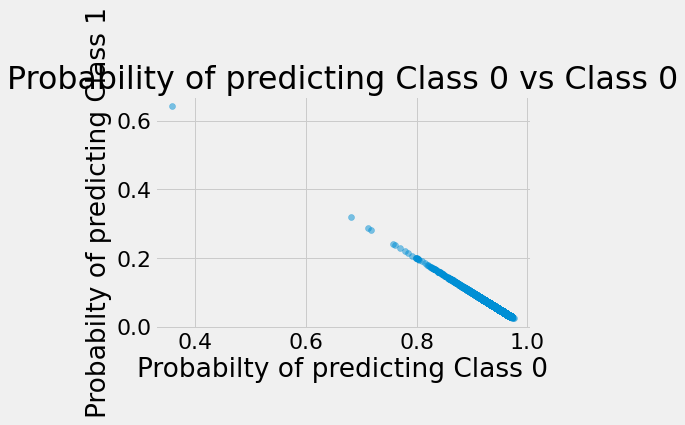

In [58]:
fig, ax = plt.subplots()
plt.scatter(log_probs[:,0], log_probs[:,1], alpha=0.5)

plt.title('Probability of predicting Class 0 vs Class 0')
ax.set_xlabel('Probabilty of predicting Class 0')
ax.set_ylabel('Probabilty of predicting Class 1')

plt.show()

In [59]:
count = 0
for val in log_probs[:,0]:
    if 0.8 > val > 0.2:
        count += 1
        print(val)

print(f"# of val around 0.5 = {count}")

0.6808790987545998
0.7617194213669966
0.7925043387544233
0.7987388431686576
0.758205360489217
0.7848724952026134
0.7986958033599965
0.7796293139007876
0.7176941924093498
0.35773264559972195
0.7998408917384923
0.7703653498409063
0.7115834143557737
# of val around 0.5 = 13


In [60]:
count = 0
for val in log_probs[:,1]:
    if val >= 0.9:
        count += 1
        print(val)

print(f"# of val above 0.9 = {count}")
print(f"% of val above 0.9 = {count/len(log_probs[:,1])}")

# of val above 0.9 = 0
% of val above 0.9 = 0.0


### Classifier 3: Support Vector Machine (SVC)

In [68]:
from sklearn.svm import SVC, LinearSVC

In [69]:
# %%time
# clf_svm_rbf_cvs = cross_val_score(clf_svm_rbf, X, y, 
#                               cv=10, 
#                               n_jobs=-1,)

# print(f"GaussianNB 10-CV score: {clf_svm_rbf_cvs}")
# print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(clf_svm_rbf_cvs)}")

In [70]:
%%time
clf_svm_rbf = SVC(probability=True,
                  kernel='rbf',
                  verbose=2,
                  random_state=42,)

clf_svm_rbf.fit(X_train,y_train)

clf_svm_rbf_predicted = clf_svm_rbf.predict(X_test)
clf_svm_rbf_precision = precision_score(y_test, clf_svm_rbf_predicted)
clf_svm_rbf_recall = recall_score(y_test, clf_svm_rbf_predicted)
clf_svm_rbf_f1 = f1_score(y_test, clf_svm_rbf_predicted)

print(f'Accuracy Score:  {clf_svm_rbf.score(X_test,y_test)}')
print(f'Precision Score: {clf_svm_rbf_precision}')
print(f'Recall Score: {clf_svm_rbf_recall}')
print(f'F1 Score: {clf_svm_rbf_f1}')

[LibSVM]Accuracy Score:  0.9700951315053161
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0
Wall time: 1min 22s


In [71]:
%%time
clf_svm_rbf = SVC(probability=True,
                  kernel='rbf',
                  verbose=2,
                  random_state=42,)

clf_svm_rbf.fit(X_train_10k, y_train_10k)

clf_svm_rbf_predicted = clf_svm_rbf.predict(X_test_10k)
clf_svm_rbf_precision = precision_score(y_test_10k, clf_svm_rbf_predicted)
clf_svm_rbf_recall = recall_score(y_test_10k, clf_svm_rbf_predicted)
clf_svm_rbf_f1 = f1_score(y_test_10k, clf_svm_rbf_predicted)

print(f'Accuracy Score:  {clf_svm_rbf.score(X_test_10k, y_test_10k)}')
print(f'Precision Score: {clf_svm_rbf_precision}')
print(f'Recall Score: {clf_svm_rbf_recall}')
print(f'F1 Score: {clf_svm_rbf_f1}')

[LibSVM]Accuracy Score:  0.9084
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0
Wall time: 823 ms


In [72]:
%%time
clf_svm_rbf = SVC(probability=True,
                  kernel='rbf',
                  verbose=2,
                  random_state=42,)

clf_svm_rbf.fit(X_train_50k, y_train_50k)

clf_svm_rbf_predicted = clf_svm_rbf.predict(X_test_50k)
clf_svm_rbf_precision = precision_score(y_test_50k, clf_svm_rbf_predicted)
clf_svm_rbf_recall = recall_score(y_test_50k, clf_svm_rbf_predicted)
clf_svm_rbf_f1 = f1_score(y_test_50k, clf_svm_rbf_predicted)

print(f'Accuracy Score:  {clf_svm_rbf.score(X_test_50k, y_test_50k)}')
print(f'Precision Score: {clf_svm_rbf_precision}')
print(f'Recall Score: {clf_svm_rbf_recall}')
print(f'F1 Score: {clf_svm_rbf_f1}')

[LibSVM]Accuracy Score:  0.95432
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0
Wall time: 9.51 s


In [73]:
%%time
clf_svm_rbf = SVC(probability=True,
                  kernel='rbf',
                  verbose=2,
                  random_state=42,)

clf_svm_rbf.fit(X_train_100k, y_train_100k)

clf_svm_rbf_predicted = clf_svm_rbf.predict(X_test_100k)
clf_svm_rbf_precision = precision_score(y_test_100k, clf_svm_rbf_predicted)
clf_svm_rbf_recall = recall_score(y_test_100k, clf_svm_rbf_predicted)
clf_svm_rbf_f1 = f1_score(y_test_100k, clf_svm_rbf_predicted)

print(f'Accuracy Score:  {clf_svm_rbf.score(X_test_100k, y_test_100k)}')
print(f'Precision Score: {clf_svm_rbf_precision}')
print(f'Recall Score: {clf_svm_rbf_recall}')
print(f'F1 Score: {clf_svm_rbf_f1}')

[LibSVM]Accuracy Score:  0.95908
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0
Wall time: 33.8 s


In [ ]:
svm_rbf_probs = GNB.predict_proba(X_test)

In [ ]:
print(f"min of left col = {min(svm_rbf_probs[:,0])}, max of right col = {max(svm_rbf_probs[:,1])}")
print(f"max of left col = {max(svm_rbf_probs[:,0])}, min of right col = {min(svm_rbf_probs[:,1])}")

In [ ]:
fig, ax = plt.subplots()
plt.scatter(svm_rbf_probs[:,0], svm_rbf_probs[:,1], alpha=0.5)

plt.title('Probability of predicting Class 0 vs Class 0')
ax.set_xlabel('Probabilty of predicting Class 0')
ax.set_ylabel('Probabilty of predicting Class 1')

plt.show()

In [ ]:
count = 0
for val in svm_rbf_probs[:,0]:
    if 0.8 > val > 0.2:
        count += 1
        print(val)

print(f"# of val around 0.5 = {count}")
print(f"% of val around 0.5 = {count/len(svm_rbf_probs[:,1])}")

In [ ]:
count = 0
for val in svm_rbf_probs[:,1]:
    if val >= 0.9:
        count += 1
        print(val)

print(f"# of val above 0.9 = {count}")
print(f"% of val above 0.9 = {count/len(svm_rbf_probs[:,1])}")

### LinearSVC

In [ ]:
%%time
from sklearn.svm import LinearSVC

clf_svm_lin = LinearSVC(
#                         probability=True,
                         verbose=2,
                         random_state=42,)

clf_svm_lin.fit(X_train,y_train)

In [ ]:
%%time
clf_svm_lin.score(X_test,y_test)

%%time
from sklearn.model_selection import cross_val_score

clf_svm_lin_cvs = cross_val_score(clf_svm_lin, X, y, 
                              cv=10, 
                              n_jobs=-1,)

print(f"GaussianNB 10-CV score: {clf_svm_lin_cvs}")
print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(clf_svm_lin_cvs)}")

In [ ]:
svm_lin_probs = GNB.predict_proba(X_test)

In [ ]:
print(f"min of left col = {min(svm_lin_probs[:,0])}, max of right col = {max(svm_lin_probs[:,1])}")
print(f"max of left col = {max(svm_lin_probs[:,0])}, min of right col = {min(svm_lin_probs[:,1])}")

In [ ]:
fig, ax = plt.subplots()
plt.scatter(svm_lin_probs[:,0], svm_lin_probs[:,1], alpha=0.5)

plt.title('Probability of predicting Class 0 vs Class 0')
ax.set_xlabel('Probabilty of predicting Class 0')
ax.set_ylabel('Probabilty of predicting Class 1')

plt.show()

In [ ]:
count = 0
for val in svm_lin_probs[:,0]:
    if 0.8 > val > 0.2:
        count += 1
        print(val)

print(f"# of val around 0.5 = {count}")
print(f"% of val around 0.5 = {count/len(svm_lin_probs[:,1])}")

In [ ]:
count = 0
for val in svm_lin_probs[:,1]:
    if val >= 0.9:
        count += 1
        print(val)

print(f"# of val above 0.9 = {count}")
print(f"% of val above 0.9 = {count/len(svm_lin_probs[:,1])}")

### Classifier 4: Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
%%time
clf_rdf.score(X_test,y_test)

NameError: name 'clf_rdf' is not defined

In [63]:
# %%time
# from sklearn.model_selection import cross_val_score

# clf_rdf_cvs = cross_val_score(clf_rdf, X, y, 
#                               cv=10, 
#                               n_jobs=-1,)

# print(f"GaussianNB 10-CV score: {clf_rdf_cvs}")
# print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(clf_rdf_cvs)}")

In [64]:
%%time
clf_rdf = RandomForestClassifier(n_jobs=-1,
                       random_state=42,
#                        verbose=2,
                                )

clf_rdf.fit(X_train,y_train)

clf_rdf_predicted = clf_rdf.predict(X_test)
clf_rdf_precision = precision_score(y_test, clf_rdf_predicted)
clf_rdf_recall = recall_score(y_test, clf_rdf_predicted)
clf_rdf_f1 = f1_score(y_test, clf_rdf_predicted)

print(f'Accuracy Score:  {clf_rdf.score(X_test,y_test)}')
print(f'Precision Score: {clf_rdf_precision}')
print(f'Recall Score: {clf_rdf_recall}')
print(f'F1 Score: {clf_rdf_f1}')

Accuracy Score:  0.9699160604364857
Precision Score: 0.1
Recall Score: 0.0007485029940119761
F1 Score: 0.001485884101040119
Wall time: 1.94 s


In [65]:
%%time
clf_rdf = RandomForestClassifier(n_jobs=-1,
                       random_state=42,
#                        verbose=2,
                                )
clf_rdf.fit(X_train_10k,y_train_10k)

clf_rdf_predicted = clf_rdf.predict(X_test_10k)
clf_rdf_precision = precision_score(y_test_10k, clf_rdf_predicted)
clf_rdf_recall = recall_score(y_test_10k, clf_rdf_predicted)
clf_rdf_f1 = f1_score(y_test_10k, clf_rdf_predicted)

print(f'Accuracy Score:  {clf_rdf.score(X_test_10k, y_test_10k)}')
print(f'Precision Score: {clf_rdf_precision}')
print(f'Recall Score: {clf_rdf_recall}')
print(f'F1 Score: {clf_rdf_f1}')

Accuracy Score:  0.9016
Precision Score: 0.3023255813953488
Recall Score: 0.056768558951965066
F1 Score: 0.09558823529411764
Wall time: 464 ms


In [66]:
%%time
clf_rdf = RandomForestClassifier(n_jobs=-1,
                       random_state=42,
#                        verbose=2,
                                )
clf_rdf.fit(X_train_50k,y_train_50k)

clf_rdf_predicted = clf_rdf.predict(X_test_50k)
clf_rdf_precision = precision_score(y_test_50k, clf_rdf_predicted)
clf_rdf_recall = recall_score(y_test_50k, clf_rdf_predicted)
clf_rdf_f1 = f1_score(y_test_50k, clf_rdf_predicted)

print(f'Accuracy Score:  {clf_rdf.score(X_test_50k, y_test_50k)}')
print(f'Precision Score: {clf_rdf_precision}')
print(f'Recall Score: {clf_rdf_recall}')
print(f'F1 Score: {clf_rdf_f1}')

Accuracy Score:  0.954
Precision Score: 0.16666666666666666
Recall Score: 0.0017513134851138354
F1 Score: 0.003466204506065858
Wall time: 699 ms


In [67]:
%%time
clf_rdf = RandomForestClassifier(n_jobs=-1,
                       random_state=42,
#                        verbose=2,
                                )
clf_rdf.fit(X_train_100k,y_train_100k)

clf_rdf_predicted = clf_rdf.predict(X_test_100k)
clf_rdf_precision = precision_score(y_test_100k, clf_rdf_predicted)
clf_rdf_recall = recall_score(y_test_100k, clf_rdf_predicted)
clf_rdf_f1 = f1_score(y_test_100k, clf_rdf_predicted)

print(f'Accuracy Score:  {clf_rdf.score(X_test_100k, y_test_100k)}')
print(f'Precision Score: {clf_rdf_precision}')
print(f'Recall Score: {clf_rdf_recall}')
print(f'F1 Score: {clf_rdf_f1}')

Accuracy Score:  0.95872
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0
Wall time: 1.15 s


In [ ]:
rdf_probs = GNB.predict_proba(X_test)

In [ ]:
print(f"min of left col = {min(rdf_probs[:,0])}, max of right col = {max(rdf_probs[:,1])}")
print(f"max of left col = {max(rdf_probs[:,0])}, min of right col = {min(rdf_probs[:,1])}")

In [ ]:
fig, ax = plt.subplots()
plt.scatter(rdf_probs[:,0], rdf_probs[:,1], alpha=0.5)

plt.title('Probability of predicting Class 0 vs Class 0')
ax.set_xlabel('Probabilty of predicting Class 0')
ax.set_ylabel('Probabilty of predicting Class 1')

plt.show()

In [ ]:
count = 0
for val in rdf_probs[:,0]:
    if 0.8 > val > 0.2:
        count += 1
        print(val)

print(f"# of val around 0.5 = {count}")
print(f"% of val around 0.5 = {count/len(rdf_probs[:,1])}")

In [ ]:
count = 0
for val in rdf_probs[:,1]:
    if val >= 0.9:
        count += 1
        print(val)

print(f"# of val above 0.9 = {count}")
print(f"% of val above 0.9 = {count/len(rdf_probs[:,1])}")

## Reappending the prediction probabilites after Gaussian NB back on X_test, to observe some behavior

1. Add predicts back on to new dataframe with X_test
2. use clf to parse for feature importance

In [ ]:
X_test_probs = X_test.copy()

GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_predicted = GNB.predict(X_test)

X_test_probs['prob_0'] = GNB_probs[:,0]
X_test_probs['prob_1'] = GNB_probs[:,1]
X_test_probs['predict_class'] = GNB.predict(X_test)
X_test_probs['label'] = y_test
X_test_probs

In [ ]:
plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(X_test_probs['views'], GNB_probs[:,0], 
                        c=X_test_probs['predict_class'], 
                        cmap='coolwarm',
                        alpha=0.6)
plt.title('Views to Probability of Predicting Class 0', fontsize='small')
plt.xlabel('Views (in millions)', fontsize='small')
plt.ylabel('Probability of Predicitng Class 0', fontsize='small')
plt.rcParams.update({'font.size': 22})


plt.legend(*scatter.legend_elements(), loc='upper right', title='Predicted Classes')
# ax.legend()

plt.show()

In [ ]:
xrange = [i for i in range(len(GNB_probs[:,0]))]

plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(X_test['comment_count'], GNB_probs[:,0], 
                        c=X_test_probs['predict_class'], 
                        cmap='coolwarm',
                        alpha=0.6)
plt.title('Comment Count to Probability of Predicting Class 0', fontsize='small')
plt.xlabel('Comment Count', fontsize='small')
plt.ylabel('Probability of Predicitng Class 0', fontsize='small')
plt.rcParams.update({'font.size': 22})


plt.legend(*scatter.legend_elements(), loc='upper right', title='Classes')
# ax.legend()

plt.show()

In [ ]:
GNB.feature_log_prob_

In [ ]:
X_test_probs

In [ ]:
# to first affirm that prob_0 and prob_1 were truly labeled as what they were supposed to be

count = 0
for i, row in X_test_probs.iterrows():
    count += 1
    if count > 5:
        break
    print(f'i:{i}, V:{row.views}, L:{row.likes}, D:{row.dislikes}, C:{row.comment_count}')
    print(f'i:{i}, Prob_0:{row.prob_0}, Prob_1:{row.prob_1}, Label:{row.label}\n')

In [ ]:
count = 0
for i, row in X_caltest_probs.iterrows():
    if 0.65 > row.prob_0 > 0.45:
        count += 1
        print(f'i:{i}, V:{row.views}, L:{row.likes}, D:{row.dislikes}, C:{row.comment_count}')
        print(f'i:{i}, Prob_0:{row.prob_0}, Prob_1:{row.prob_1}, Label:{row.label}\n')
        
print(f'\nCount = {count}')

### Other observations

In [ ]:
len(X_test)

In [ ]:
np.array(X_test[19:20])

In [ ]:
y_test[19:20]

In [ ]:
GNB.predict_proba(X_test[:-1])

In [ ]:
GNB.predict(X_test[5::-1])

In [ ]:
# custom 
print(GNB.predict(np.array([[17158579, 787425, 43420, 125882]])))
print(GNB.predict_proba(np.array([[17158579, 787425, 43420, 125882]])))

In [ ]:
# custom 
arr2 = [4567, 787, 430, 125]
print(GNB.predict(np.array([arr2])))
print(GNB.predict_proba(np.array([arr2])))

### Using only views, comments, and likes to graph 3D

In [ ]:
X3 = X.drop(['dislikes'],axis=1)
X3

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.25, random_state=42)

In [ ]:
X3_train

In [ ]:
y3_train

### Gaussian Naive Bayes on views, comments, likes, only

In [ ]:
GNB_3 = GaussianNB()
GNB_3.fit(X3_train, y3_train)

In [ ]:
GNB_3.score(X3_test, y3_test)

In [ ]:
from sklearn.model_selection import cross_val_score

GNB_3_cvs = cross_val_score(GNB_3, X, y, 
                          cv=10, 
                          n_jobs=-1,)

print(GNB_3_cvs)
print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(GNB_3_cvs)}")

### Bernoulli Naive Bayes on 4 stats, then the 3 stats

In [ ]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

In [ ]:
BNB.score(X_test, y_test)

In [ ]:
BNB_cvs = cross_val_score(BNB, X, y, 
                          cv=10, 
                          n_jobs=-1,)

print(f"GaussianNB 10-CV score: {BNB_cvs}")
print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(BNB_cvs)}")

In [ ]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X3_train, y_train)

In [ ]:
BNB.score(X3_test, y_test)

In [ ]:
BNB_cvs = cross_val_score(BNB, X, y, 
                          cv=10, 
                          n_jobs=-1,)

print(f"GaussianNB 10-CV score: {BNB_cvs}")
print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(BNB_cvs)}")

### Random Forest Classifier on 4 stats, looking at feature importance

In [ ]:
%%time 
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

In [ ]:
%%time
rf_clf.score(X_test,y_test)

## Taking a look at feature importance from Random Forest

In [ ]:
# quick investigation into the correlation of features to the label
df_nostr.corr()["trend_over_5_days"].sort_values(ascending=False)

In [ ]:
rf_clf.feature_importances_

In [ ]:
plt.barh(X.columns, rf_clf.feature_importances_)

In [ ]:
%%time
import shap

explainer = shap.TreeExplainer(rf_clf)

In [ ]:
%%time
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(shape_values, X_test, plot_type="bar")

In [ ]:
shap.summary_plot(shape_values, X_train)

In [ ]:
# X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
# y = np.array([1, 1, 2, 2])
# from sklearn.svm import SVC
# clf = SVC(probability=True)
# clf.fit(X, y) 
# print(clf.predict([[-0.8, -1]]))
# print(clf.predict_proba([[-0.8, -1]]))

### Heat Map remade with Spearman's rank correlation 

In [ ]:
import seaborn as sns

sns.heatmap(df_nostr.corr(method='spearman'),annot=True,cmap='coolwarm')

In [ ]:
sns.heatmap(df_nostr.corr(method='pearson'),annot=True,cmap='coolwarm_r')

In [ ]:
df_nostr.corr(method='pearson')['trend_over_5_days']